In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from helper_dataset import get_dataloaders_mnist
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples

In [ ]:
RANDOM_SEED = 1
BATCH_SIZE = 64
NUM_EPOCHS = 20
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_loader, valid_loader, test_loader = get_dataloaders_mnist(batch_size=BATCH_SIZE, validation_fraction=0.1)

# Checking the dataset
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Image batch dimensions: torch.Size([64, 1, 28, 28])
Image label dimensions: torch.Size([64])
Class labels of 10 examples: tensor([2, 9, 3, 0, 8, 2, 5, 2, 3, 4])


In [ ]:
class MLPNet(nn.Module):
      def __init__(self):
         super(MLPNet, self).__init__()
         self.fc1 = nn.Linear(784, 256)
         self.fc2 = nn.Linear(256, 256)
         self.fc3 = nn.Linear(256, 10)

      def forward(self, x):
         x = x.view(-1, 28*28)
         x = F.relu(self.fc1(x))
         x = F.relu(self.fc2(x))
         x = self.fc3(x)
         return x

      def name(self):
         return "MLP"

In [ ]:
model = MLPNet()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0)

In [ ]:
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

Epoch: 001/020 | Batch 0000/0843 | Loss: 2.3064
Epoch: 001/020 | Batch 0050/0843 | Loss: 2.2820
Epoch: 001/020 | Batch 0100/0843 | Loss: 2.2714
Epoch: 001/020 | Batch 0150/0843 | Loss: 2.2457
Epoch: 001/020 | Batch 0200/0843 | Loss: 2.2197
Epoch: 001/020 | Batch 0250/0843 | Loss: 2.1419
Epoch: 001/020 | Batch 0300/0843 | Loss: 2.0879
Epoch: 001/020 | Batch 0350/0843 | Loss: 2.0785
Epoch: 001/020 | Batch 0400/0843 | Loss: 1.9656
Epoch: 001/020 | Batch 0450/0843 | Loss: 1.8305
Epoch: 001/020 | Batch 0500/0843 | Loss: 1.6400
Epoch: 001/020 | Batch 0550/0843 | Loss: 1.4777
Epoch: 001/020 | Batch 0600/0843 | Loss: 1.2426
Epoch: 001/020 | Batch 0650/0843 | Loss: 1.1712
Epoch: 001/020 | Batch 0700/0843 | Loss: 1.1498
Epoch: 001/020 | Batch 0750/0843 | Loss: 0.9303
Epoch: 001/020 | Batch 0800/0843 | Loss: 0.9504
Epoch: 001/020 | Train: 80.48% | Validation: 84.17%
Time elapsed: 0.26 min
Epoch: 002/020 | Batch 0000/0843 | Loss: 0.7361
Epoch: 002/020 | Batch 0050/0843 | Loss: 0.8466
Epoch: 002/02

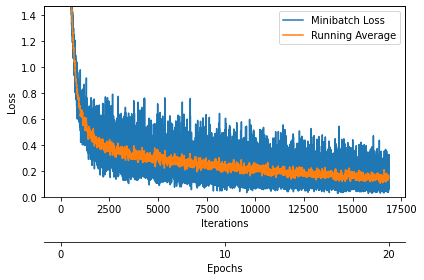

In [ ]:
plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

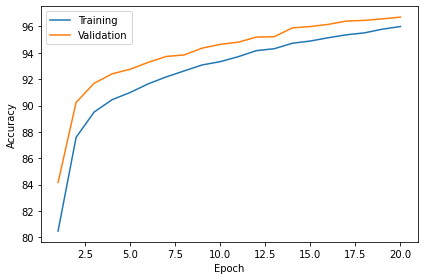

In [ ]:
plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.show()

In [ ]:
optimizer_sgb_momentum = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.92)

In [ ]:
minibatch_loss_list_sgb_momentum, train_acc_list_sgb_momentum, valid_acc_list_sgb_momentum = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer_sgb_momentum,
    device=DEVICE)

Epoch: 001/020 | Batch 0000/0843 | Loss: 0.0742
Epoch: 001/020 | Batch 0050/0843 | Loss: 0.1686
Epoch: 001/020 | Batch 0100/0843 | Loss: 0.2552
Epoch: 001/020 | Batch 0150/0843 | Loss: 0.2462
Epoch: 001/020 | Batch 0200/0843 | Loss: 0.0612
Epoch: 001/020 | Batch 0250/0843 | Loss: 0.1934
Epoch: 001/020 | Batch 0300/0843 | Loss: 0.1575
Epoch: 001/020 | Batch 0350/0843 | Loss: 0.1653
Epoch: 001/020 | Batch 0400/0843 | Loss: 0.0586
Epoch: 001/020 | Batch 0450/0843 | Loss: 0.0680
Epoch: 001/020 | Batch 0500/0843 | Loss: 0.2555
Epoch: 001/020 | Batch 0550/0843 | Loss: 0.2142
Epoch: 001/020 | Batch 0600/0843 | Loss: 0.1690
Epoch: 001/020 | Batch 0650/0843 | Loss: 0.0503
Epoch: 001/020 | Batch 0700/0843 | Loss: 0.2615
Epoch: 001/020 | Batch 0750/0843 | Loss: 0.0352
Epoch: 001/020 | Batch 0800/0843 | Loss: 0.2370
Epoch: 001/020 | Train: 97.05% | Validation: 97.10%
Time elapsed: 0.28 min
Epoch: 002/020 | Batch 0000/0843 | Loss: 0.1793
Epoch: 002/020 | Batch 0050/0843 | Loss: 0.2210
Epoch: 002/02

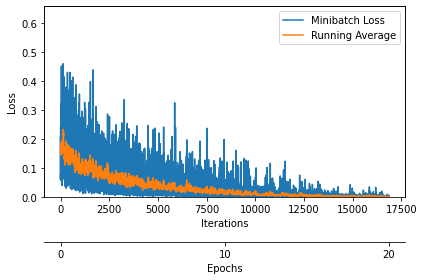

In [ ]:
plot_training_loss(minibatch_loss_list=minibatch_loss_list_sgb_momentum,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

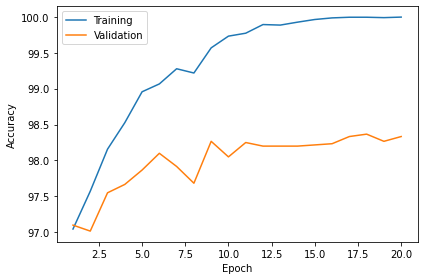

In [ ]:
plot_accuracy(train_acc_list=train_acc_list_sgb_momentum,
              valid_acc_list=valid_acc_list_sgb_momentum,
              results_dir=None)
plt.show()

In [ ]:
optimizer_rms = torch.optim.RMSprop(model.parameters())

In [ ]:
minibatch_loss_list_rms, train_acc_list_rms, valid_acc_list_rms = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer_rms,
    device=DEVICE)

Epoch: 001/020 | Batch 0000/0843 | Loss: 0.0023
Epoch: 001/020 | Batch 0050/0843 | Loss: 0.2789
Epoch: 001/020 | Batch 0100/0843 | Loss: 0.3910
Epoch: 001/020 | Batch 0150/0843 | Loss: 0.2249
Epoch: 001/020 | Batch 0200/0843 | Loss: 0.4024
Epoch: 001/020 | Batch 0250/0843 | Loss: 0.2268
Epoch: 001/020 | Batch 0300/0843 | Loss: 0.2609
Epoch: 001/020 | Batch 0350/0843 | Loss: 0.2326
Epoch: 001/020 | Batch 0400/0843 | Loss: 0.3796
Epoch: 001/020 | Batch 0450/0843 | Loss: 0.2627
Epoch: 001/020 | Batch 0500/0843 | Loss: 0.0513
Epoch: 001/020 | Batch 0550/0843 | Loss: 0.3572
Epoch: 001/020 | Batch 0600/0843 | Loss: 0.2655
Epoch: 001/020 | Batch 0650/0843 | Loss: 0.2902
Epoch: 001/020 | Batch 0700/0843 | Loss: 0.2997
Epoch: 001/020 | Batch 0750/0843 | Loss: 0.1568
Epoch: 001/020 | Batch 0800/0843 | Loss: 0.1073
Epoch: 001/020 | Train: 95.50% | Validation: 95.68%
Time elapsed: 0.28 min
Epoch: 002/020 | Batch 0000/0843 | Loss: 0.1145
Epoch: 002/020 | Batch 0050/0843 | Loss: 0.1183
Epoch: 002/02

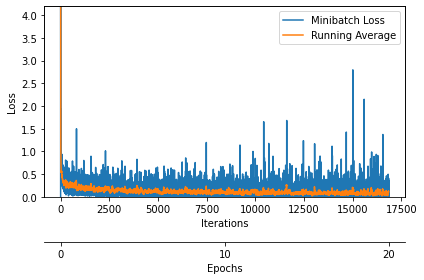

In [ ]:
plot_training_loss(minibatch_loss_list=minibatch_loss_list_rms,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

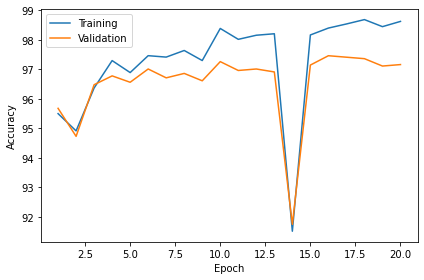

In [ ]:
plot_accuracy(train_acc_list=train_acc_list_rms,
              valid_acc_list=valid_acc_list_rms,
              results_dir=None)
plt.show()

In [ ]:
optimizer_adam = torch.optim.Adam(model.parameters())

In [ ]:
minibatch_loss_list_adam, train_acc_list_adam, valid_acc_list_adam = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer_adam,
    device=DEVICE)

Epoch: 001/020 | Batch 0000/0843 | Loss: 0.0001
Epoch: 001/020 | Batch 0050/0843 | Loss: 0.0145
Epoch: 001/020 | Batch 0100/0843 | Loss: 0.0084
Epoch: 001/020 | Batch 0150/0843 | Loss: 0.0666
Epoch: 001/020 | Batch 0200/0843 | Loss: 0.0000
Epoch: 001/020 | Batch 0250/0843 | Loss: 0.1793
Epoch: 001/020 | Batch 0300/0843 | Loss: 0.0081
Epoch: 001/020 | Batch 0350/0843 | Loss: 0.0005
Epoch: 001/020 | Batch 0400/0843 | Loss: 0.0002
Epoch: 001/020 | Batch 0450/0843 | Loss: 0.0820
Epoch: 001/020 | Batch 0500/0843 | Loss: 0.0213
Epoch: 001/020 | Batch 0550/0843 | Loss: 0.0287
Epoch: 001/020 | Batch 0600/0843 | Loss: 0.0744
Epoch: 001/020 | Batch 0650/0843 | Loss: 0.0425
Epoch: 001/020 | Batch 0700/0843 | Loss: 0.0347
Epoch: 001/020 | Batch 0750/0843 | Loss: 0.0618
Epoch: 001/020 | Batch 0800/0843 | Loss: 0.1434
Epoch: 001/020 | Train: 99.37% | Validation: 97.93%
Time elapsed: 0.32 min
Epoch: 002/020 | Batch 0000/0843 | Loss: 0.0087
Epoch: 002/020 | Batch 0050/0843 | Loss: 0.0808
Epoch: 002/02

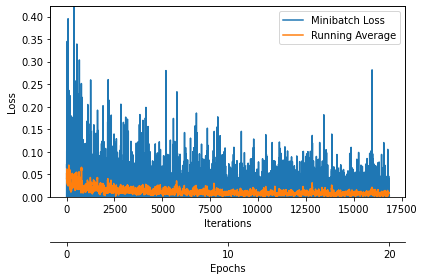

In [ ]:
plot_training_loss(minibatch_loss_list=minibatch_loss_list_adam,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()
















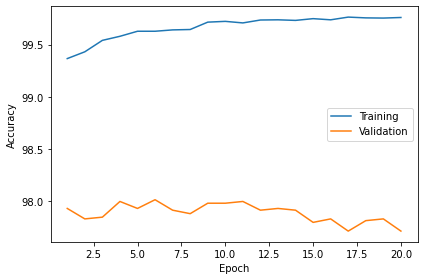

In [ ]:
plot_accuracy(train_acc_list=train_acc_list_adam,
              valid_acc_list=valid_acc_list_adam,
              results_dir=None)
plt.show()







## Performance of optimizers

## We can see that vanila SGD was able to converge although it had to do some epochs and there were some good number of oscillations too. The accuracy as well was not so good, it only had 96% of training accuracy and 95 % testing error, there wasn't much overfitting.

## SGD with moment was much better than SGD, we can see that though there were oscillations at the starting, the oscillations reduced significantly as time progressed. The convergence of loss was also very good for this optimiser. There is a little overfitting here, the training accuracy shot upto 100% where as the test accuracy was 98%, overfitt but very very little.

## RMS Prop optimiser was very good without many oscillations and the loss as well converged after only a few epochs. Even though there were few oscillations they were constant over time. The accuracies were good, there wasn't much overfitting as well.

## The Adam optimiser even though a very good optimiser had a lot of oscillations and the generalisation error was also higher compared to the other optimisers. The training accuracy went upto 100% but test accuracy was below 98%